In [1]:
#pip install yfinance

In [32]:
import yfinance as yf, numpy as np, datetime as dt, matplotlib.pyplot as plt
from scipy.stats import norm 


BUILD IMAGINARY POTFOLIO

Download stock data 

In [37]:
#1. Pick 10 companys
tickers = ['AAPL', 'BAC', 'C', 'DIS', 'F', 'MSFT', 'MS','GME', 'TSLA', 'AMZN'] 
weights = np.array([0.1, 0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1])

In [60]:
#Determine time frame and download data for a SINGLE stock
start = dt.datetime(2019,1,1)
end = dt.datetime.now()

df = yf.download('AAPL', start, end)
df

# we just care about 'adjusted close' column

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,38.168350,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.366497,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.833580,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.753815,219111200
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.435398,164101200
...,...,...,...,...,...,...
2022-10-04,145.029999,146.220001,144.259995,146.100006,146.100006,87830100
2022-10-05,144.070007,147.380005,143.009995,146.399994,146.399994,79471000
2022-10-06,145.809998,147.539993,145.220001,145.429993,145.429993,68402200


In [39]:
# Now download data for all 10 companies with one line but only grab the adjusted close price for each. 
df2 = yf.download(tickers, start, end)['Adj Close']; df2

[*********************100%***********************]  10 of 10 completed


,AAPL,AMZN,BAC,C,DIS,F,GME,MS,MSFT,TSLA
Date,,,,,,,,,,
2019-01-02,38.168354,76.956497,22.921091,47.212688,107.654335,7.092320,3.160276,36.308510,97.147697,20.674667
2019-01-03,34.366501,75.014000,22.553764,46.357166,105.046211,6.984589,3.136097,35.661430,93.573845,20.024000
2019-01-04,35.833580,78.769501,23.490444,48.623863,108.286606,7.253917,3.684974,37.117363,97.925880,21.179333
2019-01-07,35.753822,81.475502,23.472076,49.047222,109.225136,7.442448,3.743005,37.485836,98.050781,22.330667
2019-01-08,36.435398,82.829002,23.426165,48.914913,110.074760,7.514268,3.822798,37.252171,98.761703,22.356667
...,...,...,...,...,...,...,...,...,...,...
2022-10-03,142.449997,115.879997,31.090000,42.560001,97.129997,11.470000,25.379999,80.379997,240.740005,242.399994
2022-10-04,146.100006,121.089996,32.380001,44.410000,101.440002,12.360000,27.600000,83.970001,248.880005,249.440002
2022-10-05,146.399994,120.949997,31.920000,43.840000,100.800003,12.510000,26.389999,83.110001,249.199997,240.809998


Calculate Return 

In [40]:
returns = df2.pct_change(); returns

,AAPL,AMZN,BAC,C,DIS,F,GME,MS,MSFT,TSLA
Date,,,,,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.099607,-0.025241,-0.016026,-0.018121,-0.024227,-0.015190,-0.007651,-0.017822,-0.036788,-0.031472
2019-01-04,0.042689,0.050064,0.041531,0.048896,0.030847,0.038560,0.175019,0.040827,0.046509,0.057697
2019-01-07,-0.002226,0.034353,-0.000782,0.008707,0.008667,0.025990,0.015748,0.009927,0.001275,0.054361
2019-01-08,0.019063,0.016612,-0.001956,-0.002698,0.007779,0.009650,0.021318,-0.006233,0.007251,0.001164
...,...,...,...,...,...,...,...,...,...,...
2022-10-03,0.030753,0.025487,0.029470,0.021358,0.029683,0.024107,0.009948,0.017340,0.033663,-0.086145
2022-10-04,0.025623,0.044960,0.041492,0.043468,0.044374,0.077594,0.087471,0.044663,0.033812,0.029043
2022-10-05,0.002053,-0.001156,-0.014206,-0.012835,-0.006309,0.012136,-0.043841,-0.010242,0.001286,-0.034598


Make Variance-Covariance Matrix

In [41]:
cov_matrix = returns.cov(); cov_matrix

,AAPL,AMZN,BAC,C,DIS,F,GME,MS,MSFT,TSLA
AAPL,0.000464,0.000309,0.000242,0.000271,0.000220,0.000244,0.000338,0.000281,0.000331,0.000447
AMZN,0.000309,0.000478,0.000164,0.000180,0.000200,0.000178,0.000276,0.000193,0.000302,0.000417
BAC,0.000242,0.000164,0.000575,0.000569,0.000325,0.000412,0.000331,0.000490,0.000230,0.000281
C,0.000271,0.000180,0.000569,0.000706,0.000363,0.000459,0.000469,0.000530,0.000253,0.000347
DIS,0.000220,0.000200,0.000325,0.000363,0.000467,0.000326,0.000252,0.000325,0.000222,0.000282
F,0.000244,0.000178,0.000412,0.000459,0.000326,0.000815,0.000552,0.000417,0.000213,0.000400
GME,0.000338,0.000276,0.000331,0.000469,0.000252,0.000552,0.010621,0.000298,0.000245,0.000695
MS,0.000281,0.000193,0.000490,0.000530,0.000325,0.000417,0.000298,0.000564,0.000265,0.000315
MSFT,0.000331,0.000302,0.000230,0.000253,0.000222,0.000213,0.000245,0.000265,0.000385,0.000400
TSLA,0.000447,0.000417,0.000281,0.000347,0.000282,0.000400,0.000695,0.000315,0.000400,0.001776


Expected Returns or Average Returns

In [42]:
avg_returns = returns.mean()
avg_returns 

AAPL    0.001603
AMZN    0.000658
BAC     0.000596
C       0.000235
DIS     0.000123
F       0.000976
GME     0.006688
MS      0.001099
MSFT    0.001121
TSLA    0.003396
dtype: float64

Count of return values

In [43]:
count = returns.count()[0]
count

949

Protfolio Variance 

Expected Portfolio Return: Average Return * Weights

Expected Portfolio Variance = Weights(Transpose) * (Covariance Matrix) * Weights

In [44]:
port_mean = avg_returns @ weights
port_std = np.sqrt(weights.T @ cov_matrix @ weights) 

In [48]:
port_mean

0.0016494331493370883

In [47]:
port_std

0.021578184531252303

Build Normal Distribution Curve

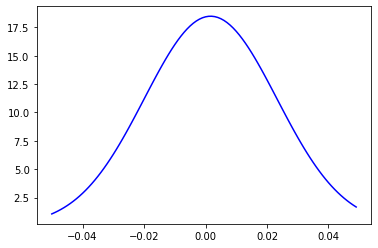

In [50]:
x = np.arange(-0.05, 0.05, 0.001)
normal_distribution = norm.pdf(x, port_mean, port_std)
plt.plot(x,normal_distribution,color = 'b')
plt.show()

Calculate VaR

In [58]:
conf_lvl = 0.05
VaR = norm.ppf(conf_lvl, port_mean, port_std)
VaR

-0.03384352193992143

We can say with 95% confidence that our portfolio will not loose more than 3.3% in 1 day.

Calculating VaR for longer time frames.

In [56]:
days = 5
VaR * np.sqrt(days)

-0.07567641565566986

Calculating Confidence Interval

In [57]:
lower = port_mean - 2 * port_std / np.sqrt(count)
higher = port_mean + 2 * port_std / np.sqrt(count)

In [54]:
lower

0.0002485181274739954

In [55]:
higher

0.0030503481712001812